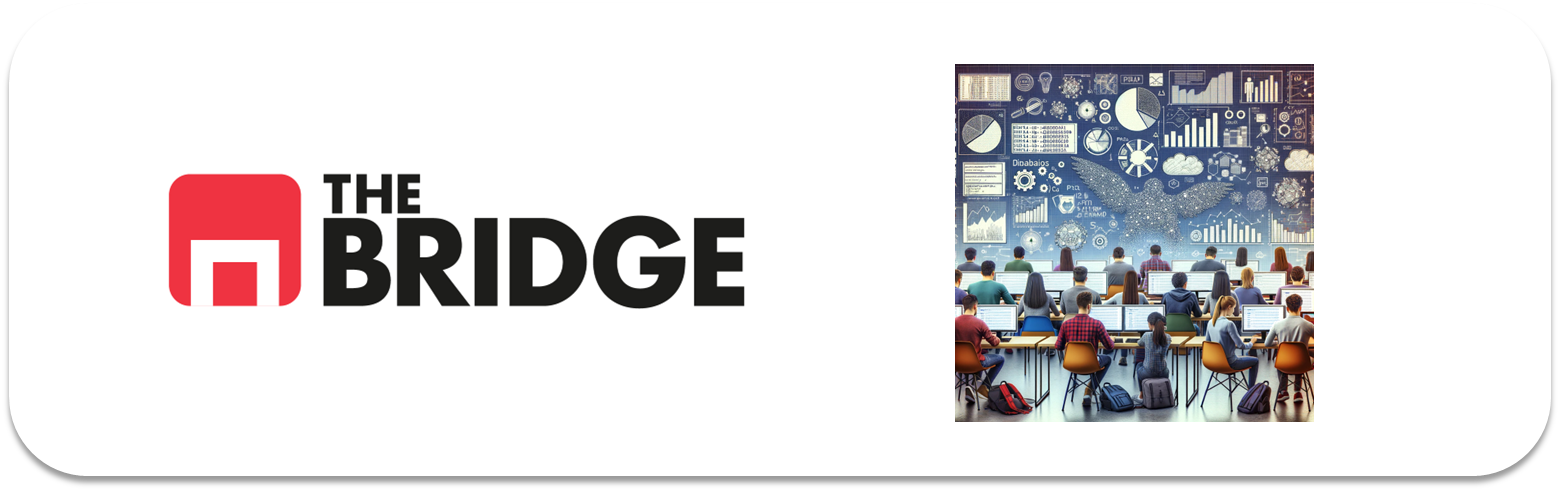

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import bootcampviztools as bt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



In [2]:
df = pd.read_csv("./data/titanic.csv")


In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [5]:
target = "survived"

In [12]:
df.deck.isna().sum() #Elimino por la cantidad de nulos que tiene esta variable. 

688

In [13]:
eliminar = ["embark_town","alive","class", "adult_male","deck"]


In [18]:
df_limpio = df.drop(eliminar,axis = 1).copy()

In [19]:
df_limpio

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,alone
0,0,3,male,22.0,1,0,7.2500,S,man,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False
2,1,3,female,26.0,0,0,7.9250,S,woman,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False
4,0,3,male,35.0,0,0,8.0500,S,man,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,man,True
887,1,1,female,19.0,0,0,30.0000,S,woman,True
888,0,3,female,NaN,1,2,23.4500,S,woman,False
889,1,1,male,26.0,0,0,30.0000,C,man,True


In [20]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   who       891 non-null    object 
 9   alone     891 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(3)
memory usage: 63.6+ KB


In [24]:
df_limpio.embarked.mode()

0    S
Name: embarked, dtype: object

In [22]:
df_limpio.loc[df_limpio["embarked"].isna(),"embarked"] = "S"

In [23]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    object 
 8   who       891 non-null    object 
 9   alone     891 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(3)
memory usage: 63.6+ KB


In [25]:
# para la edad

es_hombre = df_limpio.who == "man"
es_mujer = df_limpio.who == "woman"
es_child = df_limpio.who == "child"

mean_man = df_limpio[es_hombre]["age"].mean()
mean_woman = df_limpio[es_mujer]["age"].mean()
mean_child = df_limpio[es_child]["age"].mean()
es_nulo = df_limpio.age.isna()

df_limpio.loc[es_hombre & es_nulo, "age"] = mean_man
df_limpio.loc[es_mujer & es_nulo, "age"] = mean_woman
df_limpio.loc[es_child & es_nulo, "age"] = mean_child

In [26]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    object 
 8   who       891 non-null    object 
 9   alone     891 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(3)
memory usage: 63.6+ KB


In [27]:
# Train y Test

train_set, test_set = train_test_split(df_limpio, test_size= 0.2, random_state= 42)

In [28]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 331 to 102
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   sex       712 non-null    object 
 3   age       712 non-null    float64
 4   sibsp     712 non-null    int64  
 5   parch     712 non-null    int64  
 6   fare      712 non-null    float64
 7   embarked  712 non-null    object 
 8   who       712 non-null    object 
 9   alone     712 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(3)
memory usage: 56.3+ KB


In [29]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 709 to 10
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  179 non-null    int64  
 1   pclass    179 non-null    int64  
 2   sex       179 non-null    object 
 3   age       179 non-null    float64
 4   sibsp     179 non-null    int64  
 5   parch     179 non-null    int64  
 6   fare      179 non-null    float64
 7   embarked  179 non-null    object 
 8   who       179 non-null    object 
 9   alone     179 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(3)
memory usage: 14.2+ KB


In [30]:
# Eda

train_set[target].value_counts(normalize = True)

survived
0    0.623596
1    0.376404
Name: proportion, dtype: float64

In [31]:
features_num = ["age","sibsp","parch","fare"]

In [33]:
features_cat = ["pclass","sex","embarked","alone","who"]

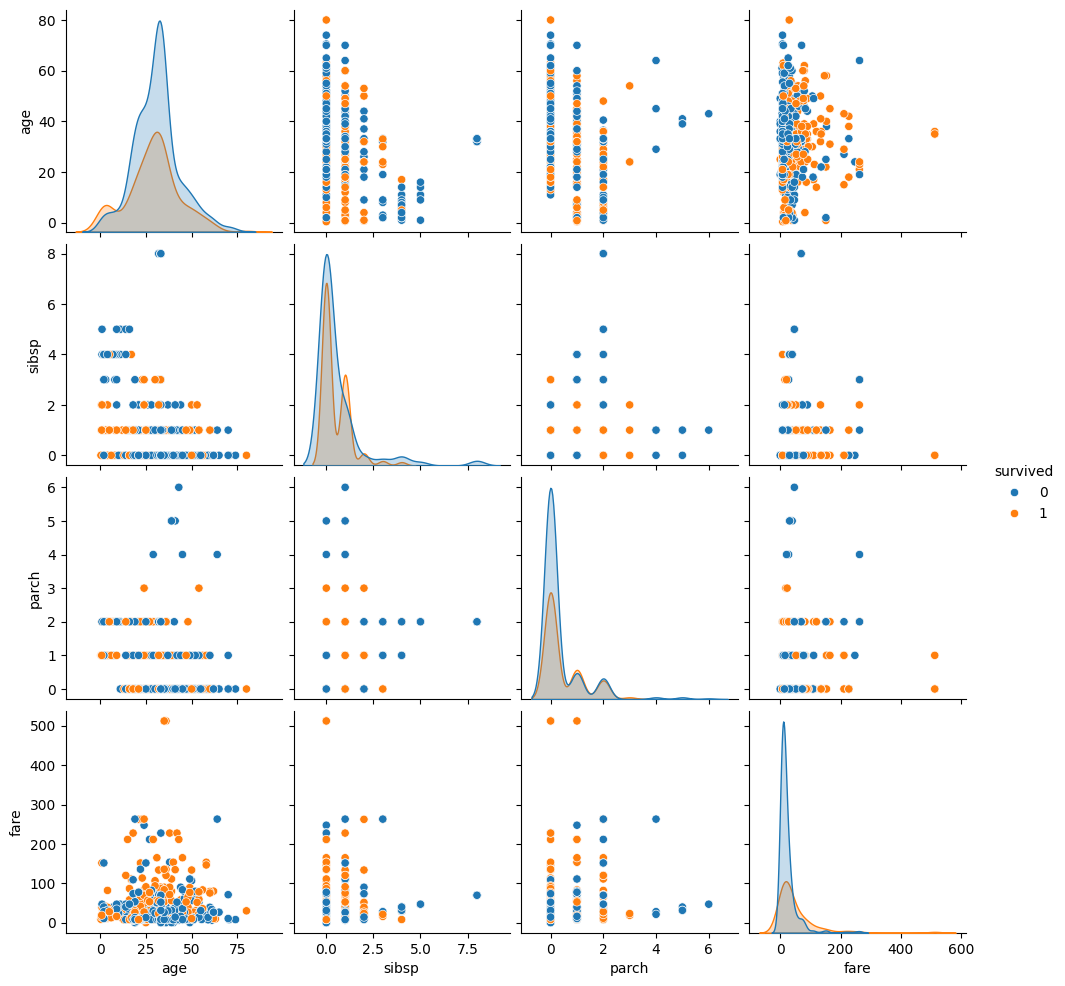

In [35]:
sns.pairplot(train_set[features_num + [target]], hue = target)

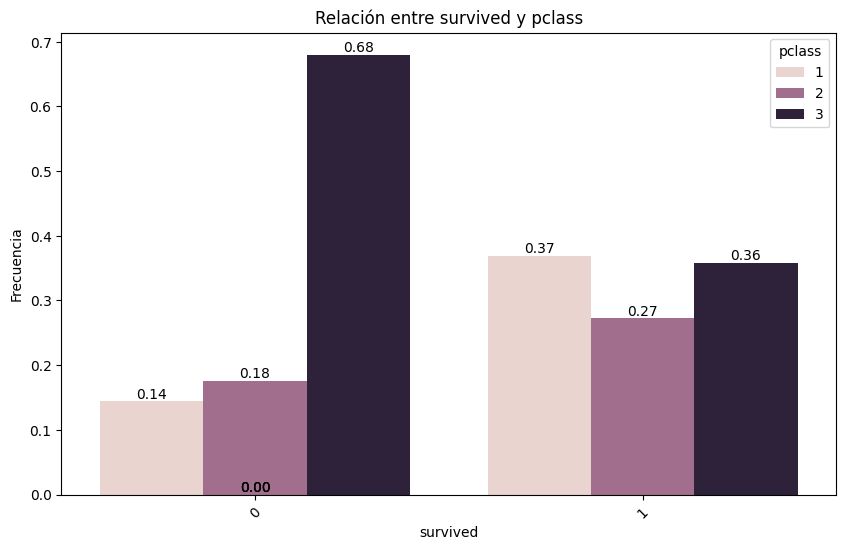

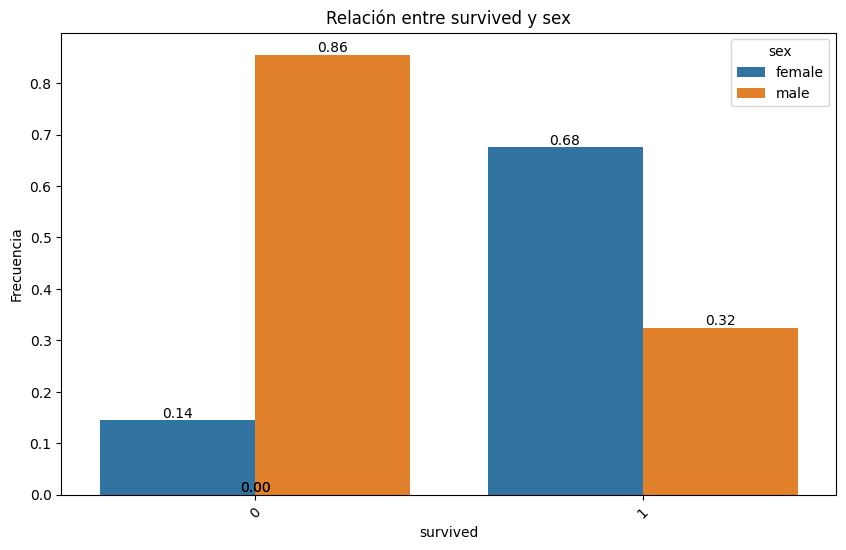

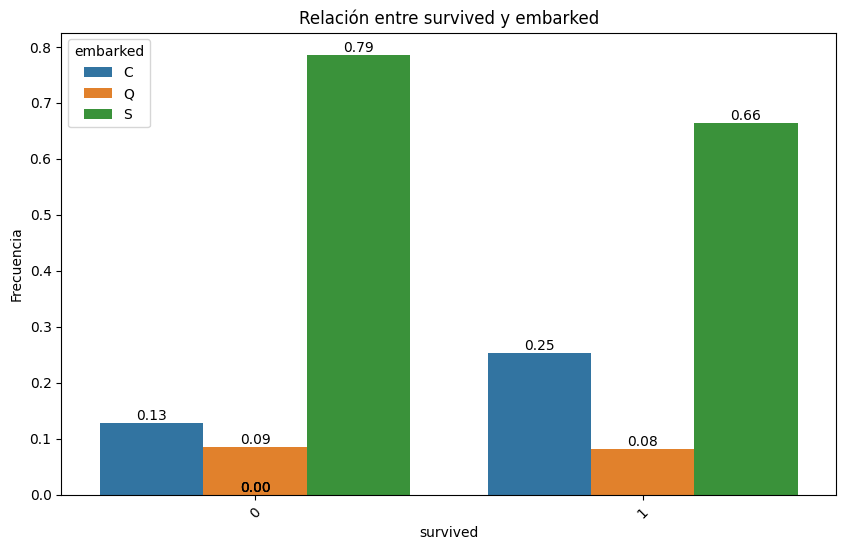

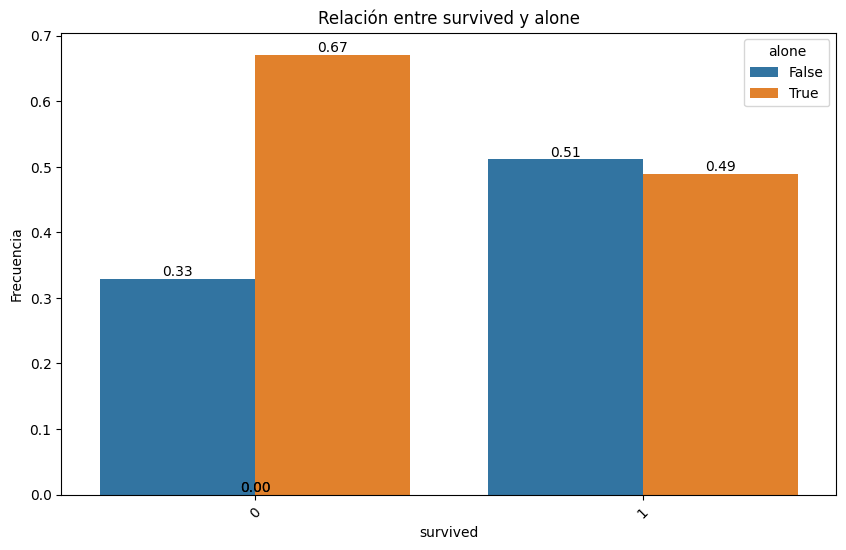

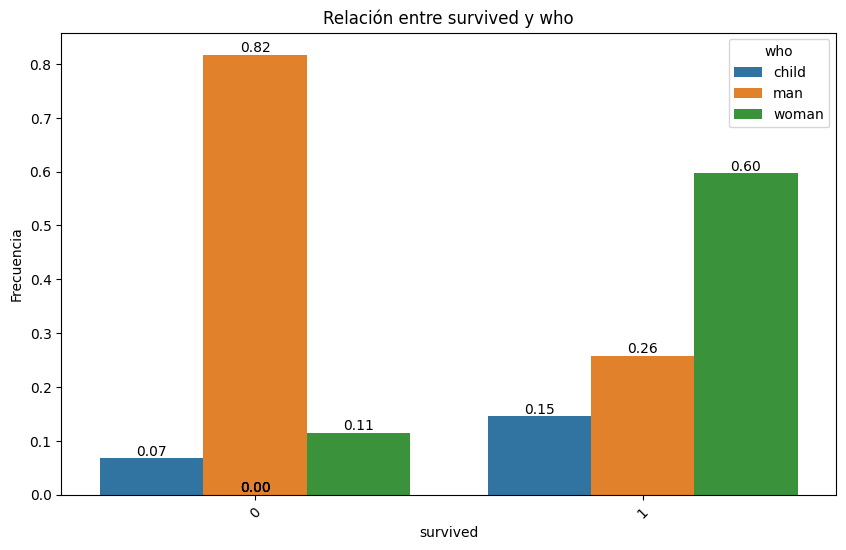

In [34]:
for feat in features_cat:
    bt.plot_categorical_relationship_fin(train_set, target, feat, show_values= True, relative_freq= True)

In [37]:
# Features Categoricas 
# las ordeno segun el orden de cada una de las variables
from sklearn.preprocessing import OrdinalEncoder
categories = [["male","female"],["S","C","Q"], ["child","woman","man"]]
encoder = OrdinalEncoder(categories= categories)
train_set[["sex","embarked","who"]] = encoder.fit_transform(train_set[["sex","embarked","who"]])
test_set[["sex","embarked","who"]] = encoder.transform(test_set[["sex","embarked","who"]])

In [38]:
train_set

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,alone
331,0,1,0.0,45.500000,0,0,28.5000,0.0,2.0,True
733,0,2,0.0,23.000000,0,0,13.0000,0.0,2.0,True
382,0,3,0.0,32.000000,0,0,7.9250,0.0,2.0,True
704,0,3,0.0,26.000000,1,0,7.8542,0.0,2.0,False
813,0,3,1.0,6.000000,4,2,31.2750,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...
106,1,3,1.0,21.000000,0,0,7.6500,0.0,1.0,True
270,0,1,0.0,33.173123,0,0,31.0000,0.0,2.0,True
860,0,3,0.0,41.000000,2,0,14.1083,0.0,2.0,False
435,1,1,1.0,14.000000,1,2,120.0000,0.0,0.0,False


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sibsp'}>],
       [<Axes: title={'center': 'parch'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

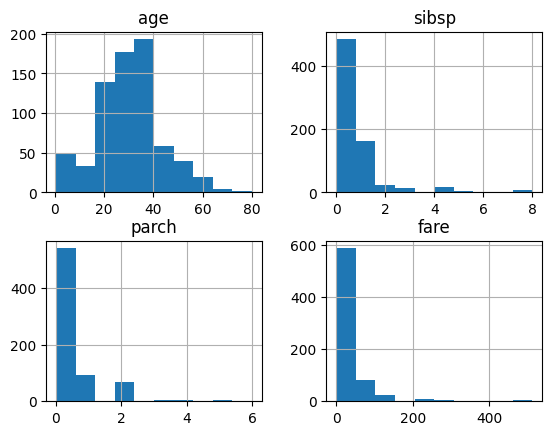

In [39]:
# Features NUmericas

train_set[features_num].hist()

In [41]:
train_set["fare"] = np.sqrt(train_set["fare"])
test_set["fare"] = np.sqrt(test_set["fare"])
train_set["sibsp"] = np.sqrt(train_set["sibsp"])
test_set["sibsp"] = np.sqrt(test_set["sibsp"])
train_set["parch"] = np.sqrt(train_set["parch"])
test_set["parch"] = np.sqrt(test_set["parch"])

In [42]:
train_set

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,alone
331,0,1,0.0,45.500000,0.000000,0.000000,5.338539,0.0,2.0,True
733,0,2,0.0,23.000000,0.000000,0.000000,3.605551,0.0,2.0,True
382,0,3,0.0,32.000000,0.000000,0.000000,2.815138,0.0,2.0,True
704,0,3,0.0,26.000000,1.000000,0.000000,2.802535,0.0,2.0,False
813,0,3,1.0,6.000000,2.000000,1.414214,5.592406,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...
106,1,3,1.0,21.000000,0.000000,0.000000,2.765863,0.0,1.0,True
270,0,1,0.0,33.173123,0.000000,0.000000,5.567764,0.0,2.0,True
860,0,3,0.0,41.000000,1.414214,0.000000,3.756102,0.0,2.0,False
435,1,1,1.0,14.000000,1.000000,1.414214,10.954451,0.0,0.0,False


In [43]:
scaler = StandardScaler()

In [46]:
train_set[features_num] = scaler.fit_transform(train_set[features_num])
test_set[features_num] = scaler.transform(test_set[features_num])

In [47]:
train_set.describe()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who
count,712.000000,712.000000,712.000000,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,712.000000,712.000000
mean,0.376404,2.330056,0.344101,2.744372e-17,5.239255e-17,-5.488743e-17,1.060325e-17,0.344101,1.509831
std,0.484824,0.824584,0.475408,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,0.628323,0.666594
min,0.000000,1.000000,0.000000,-2.277860e+00,-6.290657e-01,-5.426030e-01,-1.612205e+00,0.000000,0.000000
25%,0.000000,2.000000,0.000000,-6.249226e-01,-6.290657e-01,-5.426030e-01,-6.766149e-01,0.000000,1.000000
50%,0.000000,3.000000,0.000000,1.410354e-01,-6.290657e-01,-5.426030e-01,-3.486825e-01,0.000000,2.000000
75%,1.000000,3.000000,1.000000,3.708228e-01,9.590846e-01,-5.426030e-01,2.232167e-01,1.000000,2.000000
max,1.000000,3.000000,1.000000,3.817634e+00,3.862902e+00,3.982943e+00,5.910265e+00,2.000000,2.000000


In [48]:
test_set.describe()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,0.413408,2.223464,0.385475,0.061290,-0.085482,-0.002572,0.000307,0.430168,1.508380
std,0.493826,0.877501,0.488073,1.001666,0.850342,1.024250,0.890722,0.661447,0.639247
min,0.000000,1.000000,0.000000,-2.246456,-0.629066,-0.542603,-1.612205,0.000000,0.000000
25%,0.000000,1.000000,0.000000,-0.624923,-0.629066,-0.542603,-0.678340,0.000000,1.000000
50%,0.000000,3.000000,0.000000,0.141035,-0.629066,-0.542603,-0.346682,0.000000,2.000000
75%,1.000000,3.000000,1.000000,0.447419,0.959085,-0.542603,0.279824,1.000000,2.000000
max,1.000000,3.000000,1.000000,3.128272,2.547235,3.588637,3.771077,2.000000,2.000000


In [50]:
# Modelado 

X_train = train_set[features_cat]
y_train = train_set[target]
X_test = test_set[features_cat]
y_test = test_set[target]

In [51]:
log_class = LogisticRegression(max_iter = 10000)

log_class.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [55]:
def metricas(model,X, y_target):
    y_pred = model.predict(X)
    ConfusionMatrixDisplay.from_predictions(y_target, y_pred)
    print(classification_report(y_target, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       444
           1       0.82      0.67      0.74       268

    accuracy                           0.82       712
   macro avg       0.82      0.79      0.80       712
weighted avg       0.82      0.82      0.81       712



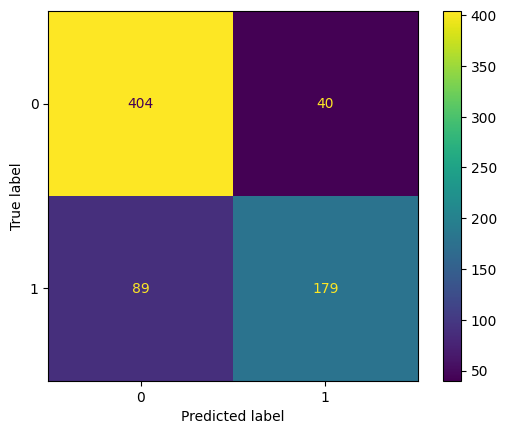

In [56]:
# Train 
metricas(log_class, X_train,y_train)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



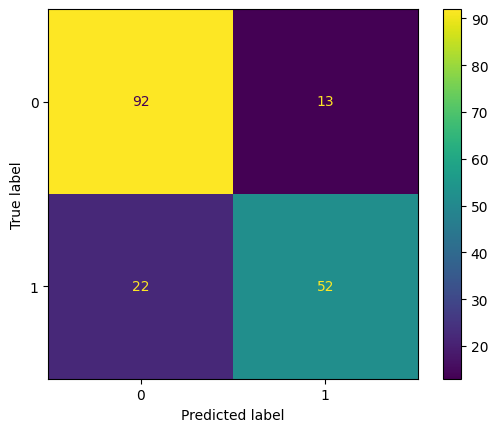

In [57]:
# Test
metricas(log_class, X_test,y_test)